<h1> Семинар 7. Полиномиальная интерполяция

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

import warnings
warnings.filterwarnings('ignore')

<h4> Задание 1

Для заданной таблицы значений:

<table>
    <tr>
        <td>x </td>
        <td>0.0100 </td>
        <td>0.0200 </td>
        <td>0.0300 </td>
        <td>0.0400 </td>
        <td>0.0500 </td>
    </tr>
    <tr>
        <td>y </td>
        <td>1.0101 </td>
        <td>1.0202 </td>
        <td>1.0305 </td>
        <td>1.0407 </td>
        <td>1.0513 </td>
    </tr>
</table>

1.1 Построить интерполяционный многочлен функции y(x) в форме Ньютона. Построить график на отрезке [-1,1].

1.2 Построить интерполяционный многочлен функции y(x) в форме Лагранжа. Построить график на отрезке [-1,1].

1.3 Воспользоваться scipy.interpolate.interp1d для интерполяции значений функции. Сравнить все 3 графика.

**1.1**

In [98]:
x = [0.0100, 0.0200, 0.0300, 0.0400, 0.0500]
y = [1.0101, 1.0202, 1.0305, 1.0407, 1.0513]

In [99]:
x = np.array(x)
y = np.array(y)
n = x.shape[0]

# разделенная разность первого порядка
f1 = np.zeros(n-1)

for i in range(n-1):
    f1[i] = (y[i+1] - y[i])/(x[i+1] - x[i])
    
f2 = np.zeros(n-2)

for i in range(n-2):
    f2[i] = (f1[i+1] - f1[i])/(x[i+2] - x[i])
    
f3 = np.zeros(n-3)

for i in range(n-3):
    f3[i] = (f2[i+1] - f2[i])/(x[i+3] - x[i])
    
f4 = np.zeros(n-4)

for i in range(n-4):
    f4[i] = (f3[i+1] - f3[i])/(x[i+4] - x[i])

In [100]:
def newton_p(x):
    res = y[0] + f1[0] * (x - x[0]) + f2[0] * (x - x[0]) * (x - x[1]) +  f3[0] * (x - x[0]) * (x - x[1]) * (x - x[2]) + f4[0] * (x - x[0]) * (x - x[1]) * (x - x[2]) * (x - x[3])
    return res

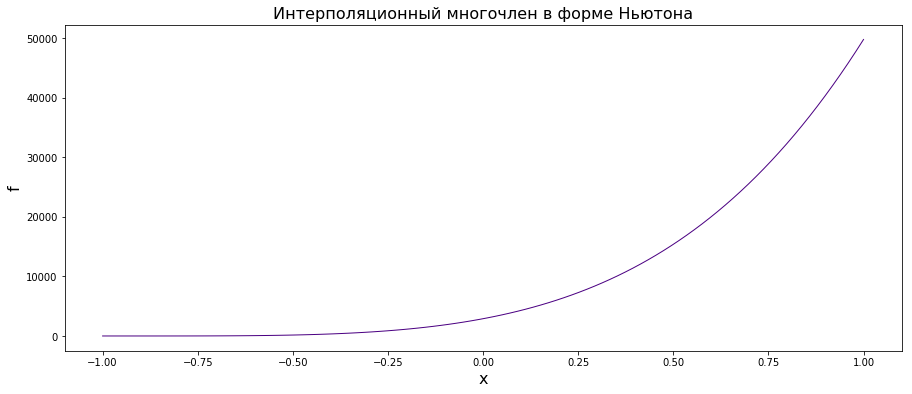

In [101]:
grid = np.linspace(-1, 1, 100)
res_n = newton_p(grid)
plt.figure(figsize=(15, 6))
plt.plot(grid, res_n, color = 'indigo', linewidth = 1)
#plt.grid(ls=':')
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Ньютона", fontsize=16)
plt.show()

**1.2**

In [22]:
def find_I(j, x):
    res = 1
    for i in range(n):
        res = res * (x - x[i])
    res = res / (x - x[j])
    for i in range(n):
        if (i!=j):
            res = res / (x[j] - x[i])
    return res

In [23]:
def lagran(x):
    res = 0
    for i in range(n):
        res = res + y[i] * find_I(i, x)
    return res

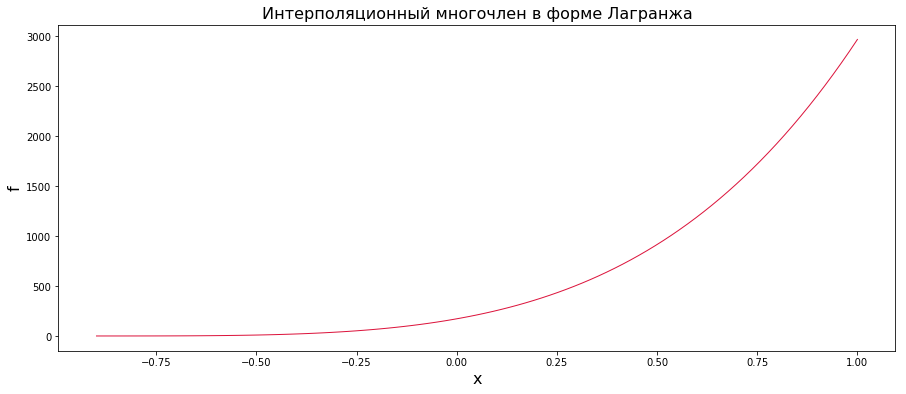

In [34]:
grid = np.linspace(-1, 1, 100)
res_lag = lagran(grid)
plt.figure(figsize=(15, 6))
plt.plot(grid, res_lag, color = 'crimson', linewidth = 1)
#plt.grid(ls=':')
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Лагранжа", fontsize=16)
plt.show()

**1.3** Сравнение трех графиков

In [102]:
f = scipy.interpolate.interp1d(x, y)

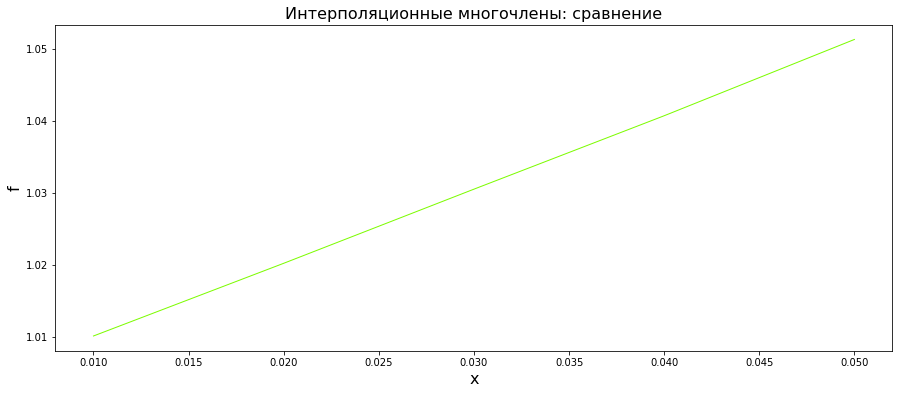

In [108]:
grid = np.linspace(x[0], x[-1], 100)
#res_lag = lagran(grid)
plt.figure(figsize=(15, 6))
#plt.plot(x, f_larg, color = 'crimson', label = "в форме Лагранжа", linewidth = 1)
#plt.plot(x, f_newt, color = 'indigo', label = "в форме Ньютона", linewidth = 1)
plt.plot(grid, f(grid), color = 'lawngreen', label = "библиотечная функция", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционные многочлены: сравнение", fontsize=16)
plt.show()

Как можно заметить, в отличие от 2 предыдущих случаев мы получили линейную функцию. Такое различие может быть объяснимо малостью промежутка, из которого мы брали изначално точки и значения функции на них.

<h4> Задание 2

Для заданной таблицы значений:

<table>
    <tr>
        <td>x </td>
        <td>0.00 </td>
        <td>0.0100 </td>
        <td>0.0200 </td>
        <td>0.0300 </td>
        <td>0.0400 </td>
        <td>0.0500 </td>
        <td>0.0500 </td>
    </tr>
    <tr>
        <td>f </td>
        <td>1.0000 </td>
        <td>1.0101 </td>
        <td>1.0202 </td>
        <td>1.0305 </td>
        <td>1.0407 </td>
        <td>1.0513 </td>
        <td>1.0618 </td>
    </tr>
     <tr>
        <td>$\Delta$f </td>
        <td>0.0001 </td>
        <td>0.0001 </td>
        <td>0.0001 </td>
        <td>0.0002 </td>
        <td>0.0002 </td>
        <td>0.0003 </td>
        <td>0.0002 </td>
    </tr>
</table>

2.1 Построить квадратичный интерполяционный многочлен в форме Ньютона и с помощью него определить f в точке 0.015. Построить график на отрезке [-10,10].

2.2 Построить интерполяционный многочлен функции y(x) в форме Лагранжа и с помощью него определить f в точке 0.015. Построить график на отрезке [-10,10].

2.3 Оценить погрешность метода при вычислении f (0.015).

2.4 Оценить неустранимую погрешность при вычислении f (0.015).

2.5 Воспользоваться scipy.interpolate.interp1d для интерполяции значений функции. Сравнить все 3 графика.

**2.1**

In [2]:
x = [0.00, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0500]
f = [1.0000, 1.0101, 1.0202, 1.0305, 1.0407, 1.0513, 1.0618]

In [3]:
x = np.array(x)
f = np.array(f)
n = x.shape[0]

# разделенная разность первого порядка
f1 = np.zeros(n-1)

for i in range(n-1):
    f1[i] = (f[i+1] - f[i])/(x[i+1] - x[i])
    
f2 = np.zeros(n-2)

for i in range(n-2):
    f2[i] = (f1[i+1] - f1[i])/(x[i+2] - x[i])
    
f3 = np.zeros(n-3)

for i in range(n-3):
    f3[i] = (f2[i+1] - f2[i])/(x[i+3] - x[i])
    
f4 = np.zeros(n-4)

for i in range(n-4):
    f4[i] = (f3[i+1] - f3[i])/(x[i+4] - x[i])
    
f5 = np.zeros(n-5)

for i in range(n-5):
    f5[i] = (f4[i+1] - f4[i])/(x[i+5] - x[i])

In [70]:
def newton_p(xx):
    res = f[0] + f1[0] * (xx - x[0]) + f2[0] * (xx - x[0]) * (xx - x[1]) +  f3[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) + f4[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) * (xx - x[3]) + f5[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) * (xx - x[3]) * (xx - x[4])
    return res

In [71]:
print("Значение в точке 0.015 равно ", newton_p(0.015))

Значение в точке 0.015 равно  1.0151105468750001


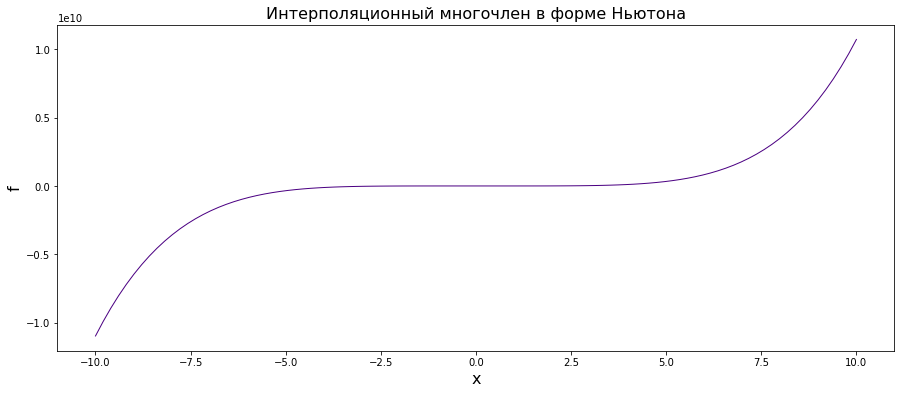

In [72]:
grid = np.linspace(-10, 10, 100)
res_n = newton_p(grid)
plt.figure(figsize=(15, 6))
plt.plot(grid, res_n, color = 'indigo', linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Ньютона", fontsize=16)
plt.show()

**1.2**

In [20]:
def find_I(j, xx):
    res = 1
    for i in range(n):
        if(i != j):
            res *= (xx - x[i])
    for i in range(n):
        if(i != j and x[j] != x[i]):
            res /= (x[j] - x[i])
    return res

In [21]:
def lagran(x):
    res = 0
    for i in range(n):
        res = res + f[i] * find_I(i, x)
    return res

In [22]:
print("Значение в точке 0.015 равно ", lagran(0.015))

Значение в точке 0.015 равно  1.1262852070312501


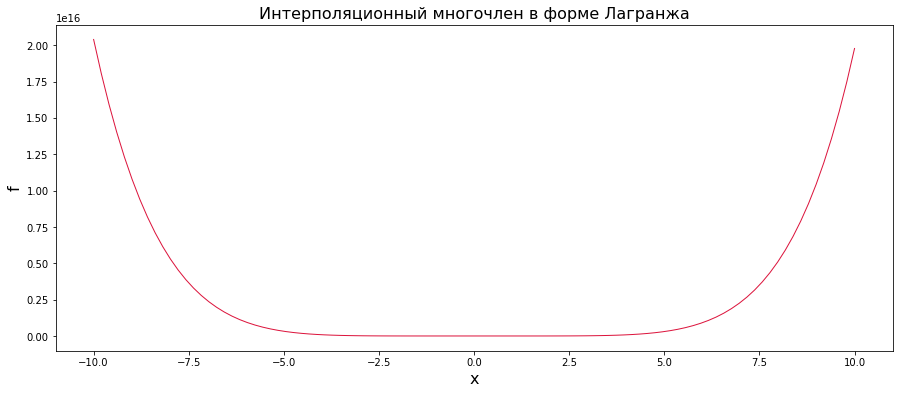

In [23]:
grid = np.linspace(-10, 10, 100)
res_n = lagran(grid)
plt.figure(figsize=(15, 6))
plt.plot(grid, res_n, color = 'crimson', linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Лагранжа", fontsize=16)
plt.show()

**1.3** Погрешность метода

In [40]:
# из лекции, ошибка не более чем:

#M_8 =  максимум 8й производной на отрезке

ermax = 0

def count_prod(xx):
    prod = 1
    for i in range(n):
        prod *= (xx - x[i])
    return abs(prod)

for elem in np.array(grid):
    el = count_prod(elem)
    if (el > ermax):
        ermax = el       
#print(ermax)

myError = 1

def fact(n):
    if n==0: 
        return 1
    else: 
        return n*fact(n-1)

myError *= count_prod(0.015)
myError /= fact(n+1)

print("Ошибка метода не более: ")
print(myError, "M_8")

Ошибка метода не более: 
4.2724609375e-18 M_8


**1.4** Неустранимая погрешность

In [53]:
def find_I(j, xx):
    res = 1.0
    for i in range(n):
        if(i != j):
            res *= (xx - x[i])
    for i in range(n):
        if(i != j and x[j] != x[i]):
            res /= (x[j] - x[i])
    return res

In [54]:
deltas = [0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0003, 0.0002]

err = 0

for i in range(n):
    err += deltas[i] * abs(find_I(i, 0.015))
    
print("Неустранимая погрешность: ", err)

Неустранимая погрешность:  0.00028683593749999993


**1.5** Библиотечный метод

In [55]:
f_real = scipy.interpolate.interp1d(x, f)

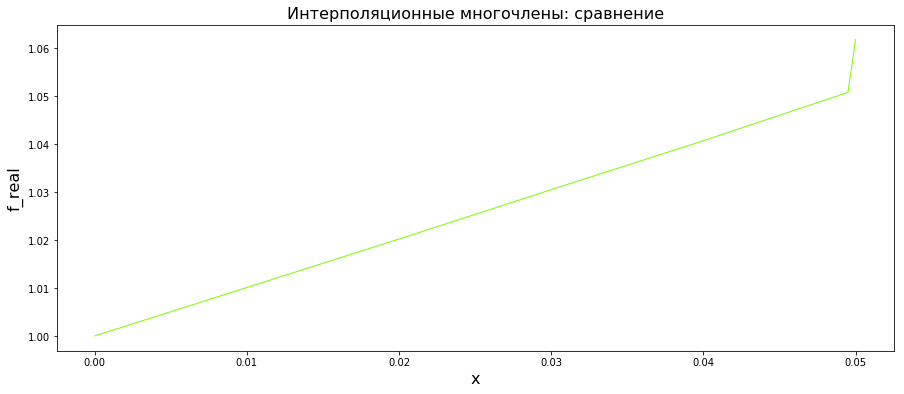

In [56]:
grid = np.linspace(x[0], x[-1], 100)
plt.figure(figsize=(15, 6))
plt.plot(grid, f_real(grid), color = 'lawngreen', label = "библиотечная функция", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f_real', fontsize=16)
plt.title("Интерполяционные многочлены: сравнение", fontsize=16)
plt.show()

В случае библиотечной функции приближение практически линейное. В то же время в первых двух случаях приближение также похоже. Однако на большом отрезке от -10 до 10 полученные методами Ньютона и Лагранжа решения сильно отличаются, скорее всего, ввиду того, что заданные в условии значения принадлежат небольшому интервалу и при выходе из него поведение функции может сильно различаться.


<h4> Задание 3

Нам дана функция $f(x) = x^2 \cos{x}$ на отрезке $x\in [-\pi, \pi]$. Решите задачу интерполяции с помощью полиномов Лагранжа и Ньютона степени $m$ with $m=1, 2, 3, 4, 5$. Постройте график полученного полинома вместе с исходной функцией.

3.1 Построить интерполяционный многочлен в форме Ньютона и с помощью него определить f в точках $x=0, \pi/2, \pi$. Построить график на отрезке $x\in [-\pi, \pi]$.

3.2 Построить интерполяционный многочлен в форме Лагранжа и с помощью него определить f в точках $x=0, \pi/2, \pi$. Построить график на отрезке $x\in [-\pi, \pi]$.

3.3 Оценить погрешность метода при вычислении значения в точках с помощью полиномов Лагранжа и Ньютона (сравнить с точным значением функции).

3.4 Какие другие методы интерполяции Вы можете предложить?.

3.5 Воспользоваться scipy.interpolate.interp1d для интерполяции значений функции. Сравнить с точностью интерполяции в п. 3.1 и 3.2.